In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [5]:
DATADIR=r"C:\Users\ASUS\Desktop\our project\Dataset\Alzheimer_s Dataset\test"
CATEGORIES=["MildDemented","ModerateDemented","NonDemented","VeryMildDemented"]

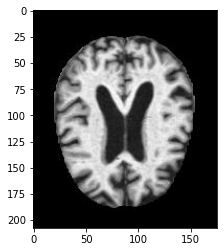

In [9]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path 
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break 

In [10]:
print(img_array.shape)

(208, 176, 3)


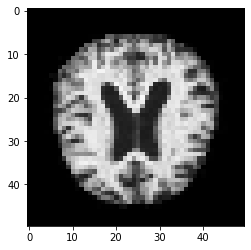

In [19]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

# begin building our training data!

In [25]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  # create path to Classification
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1 or 2 or 3). 0=MildDemented 1=ModerateDemented 2=NonDemented 3=VeryMildDemented
        for img in os.listdir(path):  # iterate over each image per all classification   
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
create_training_data()
           
        

In [26]:

print(len(training_data))

1458


In [60]:
import random

random.shuffle(training_data)

In [61]:
for sample in training_data[:10]:
    print(sample[1]) #sample[0] would be the image

2
0
0
3
2
2
2
0
2
0


In [62]:
X = []
y = []

In [63]:
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE) #-1 is how many feature that we have now negative its whatever any number

# Now to save our Data

In [64]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#  to Read our Data

In [65]:
pickle_in = open("X.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [66]:
y[1]

0

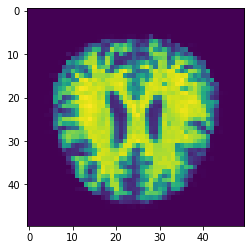

In [67]:
plt.imshow(x[1]) #x[1] is an array